# Visualización de datos con Seaborn
Seaborn es una libreria de visualizacíon en Python que trabaja sobre Matplotlib. Esta libreria nos permite generar gráficos a partir de DataFrames de Pandas de manera muy cómoda y accesible. 

Antes de empezar a trabajar vamos a importar las librerias que ya conocemos de antes, y ahora sumaremos Seaborn, la cual se suele importar con el nombre `sns`. Además, se suele acompañar de la instrucción `sns.set()` que sirve para darle un estilo particular a los gráficos, como veremos en breve.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
# sns.set() 

In [39]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [40]:
sns.set_palette('colorblind')

Seaborn ya viene con algunos datasets incorporados. Puedes ver cuáles con la siguiente instrucción:

In [18]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

Vamos a usar el dataset Iris, que ya conocemos. Para cargarlo, simplemente hacemos:

In [3]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Notar que ya lo carga en un Data Frame de Pandas. Las columnas tienen nombres ligeramente distintos a los que veníamos usando, pero la información es la misma. Veamos qué podemos hacer con Seaborn para visualizar de forma eficiente este dataset.

## 1. Diagramas de dispersión e histogramas con Seaborn.

Una instrucción muy cómoda para hacer una primera inspección de un dataset es `sns.pairplot()`. Hay que tener cuidado con esta función cuando el dataset tiene muchas instancias o columnas.

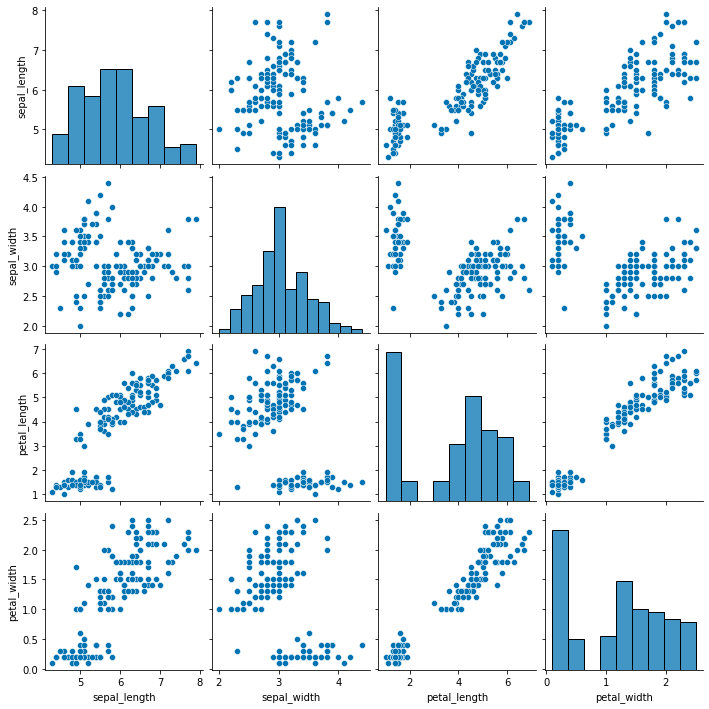

In [41]:
sns.pairplot(data)

¿Ves lo que hizo?¿Cómo describirías este gráfico? Recuerda siempre consultar la documentación.

Este grafico se puede mejorar, pasándole el argumento `hue` a la función:

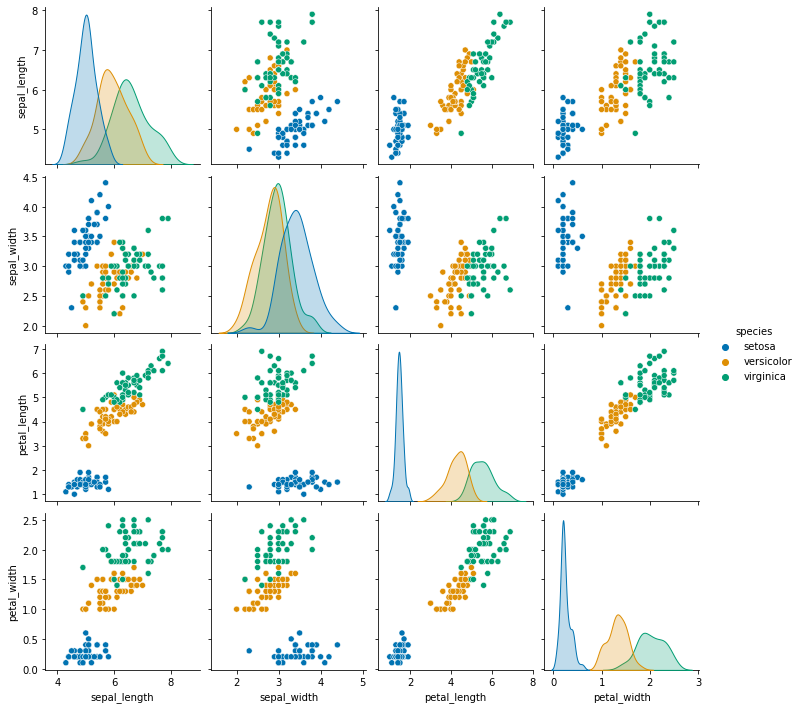

In [42]:
sns.pairplot(data, hue='species')

Éste debe ser unos de los gráficos más famosos en ciencia de datos. ¿Te parece útil?¿Por qué?

Vuelve a correr las instrucciones, pero descomentando la instrucción `sns.set()` al comienzo del código. ¿Qué cambió?

A continuación, veamos cómo generar cada componente de este gráfico de forma independiente.

### 1.1 Scatterplot

Hacer un diagrama de dispersión con Seaborn es sencillo:

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

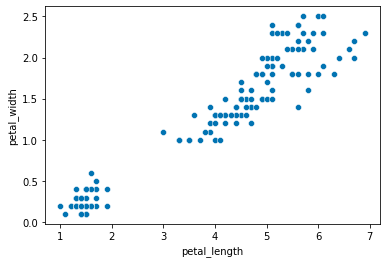

In [43]:
sns.scatterplot(x="petal_length", y="petal_width", data=data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

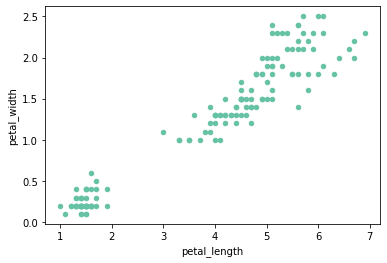

In [37]:
data.plot.scatter(x='petal_length', y='petal_width')

Y, si le pasamos la especie en el argumento `hue`, el gráfico mejora sustancialmente:

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

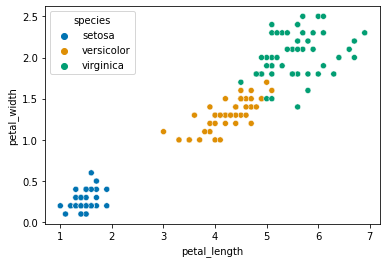

In [44]:
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=data)

**Ejercicio:** intenta hacer este mismo gráfico con Matplotlib.

### 1.2 Histogramas

Los histogramas en Seaborn son un poco más versátiles que los de Matplotlib. Veamos cómo:

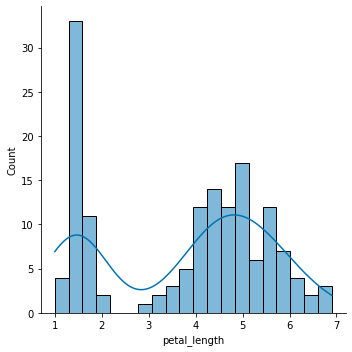

In [45]:
sns.displot(data['petal_length'], bins = 20, kde=True)#, hist = True,  kde = False, rug = True)

**Ejercicio:** Modificar los siguientes argumentos de la función `distplot` y observar qué hacen: `hist`,`kde` (prestar atención a la escala en el eje *y*) y `rug`.

Otra tipo de visualización que combina ambas opciones es `jointplot`:

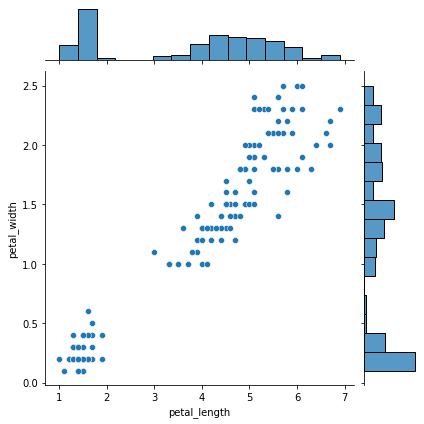

In [14]:
sns.jointplot(x="petal_length", y="petal_width", marginal_kws=dict(bins=15), data=data)

Esperamos con estos primeros ejemplos haberlos convencido que el uso de Seaborn facilita la visualización de datos provienentes de un DataFrame respecto a la utilización de (solo) Matplotlib. A continuación vamos a explorar otras funciones de visualización que nos ofrece esta libreria.

## 2. Categorical Plots

Como su nombre lo indica, los categorical plots son gráficos donde una de las variables a graficar es de tipo categórica. Este tipo de gráficos son muy usados en Data Science y Seaborn tiene algunas funciones especiales dedicada a ellos.

Una función útil para contar las diferentes etiquetas de una variable categórica es `countplot`:

<AxesSubplot:xlabel='species', ylabel='count'>

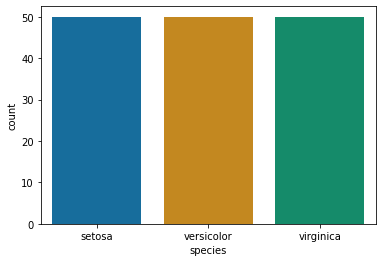

In [46]:
sns.countplot(data=data, x="species")

Así, obtenemos tres barras de altura 50, una por especie, representando la cantidad de instancias que hay en el dataset de cada una.

Muchas veces queremos graficar una variable numérica en función de una variable categórica. Por ejemplo, el ancho del pétalo según la especie. Veamos cómo realizar un grafico de este tipo en Matplotlib:

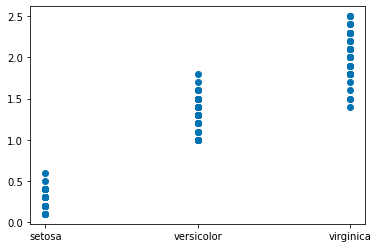

In [47]:
especie = data['species']
ancho_petalo = data['petal_width']
plt.scatter(especie,ancho_petalo)

In [30]:
ancho_petalo

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

Como podemos observar el resultado no es muy satisfactorio. Al estar todos los puntos sobre una misma linea, no se pueden distinguir entre sí. 

Veamos ahora cómo realizar el mismo gráfico son Seaborn, usando la función `catplot`:

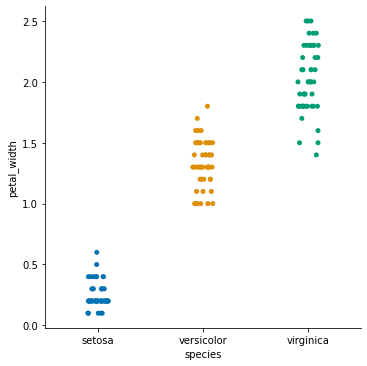

In [48]:
sns.catplot(data = data, x = "species", y = "petal_width")

Como se puede observar, Seaborn le da automáticamente distintos colores a las categorías y además los separa para poder identificar la cantidad de puntos en cada grupo con facilidad.

**Ejercicio - Challenge**:

1. Realizar con Seaborn un gráfico del largo del pétalo según la especie.
1. Realizar el mismo gráfico, pero ahora como gráfico de barras. **Pista**: ver el parametro `kind` de la función `catplot` o la función `barplot`.
1. ¿Que representan las barritas negras?
1. Averiguar la utilidad de los parámetros `ci` y `estimator`.

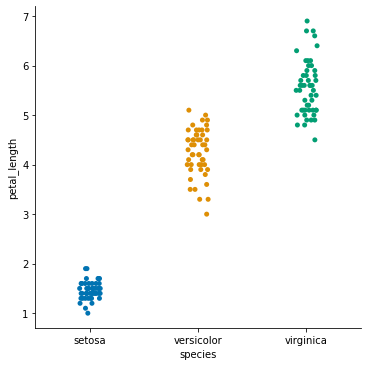

In [49]:
sns.catplot(data = data, x = "species", y = "petal_length")

<AxesSubplot:xlabel='species', ylabel='petal_length'>

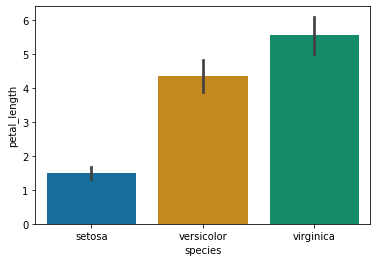

In [50]:
# sns.catplot(data = data, x = "species", y = "petal_length", kind = 'bar')#, ci = "sd", estimator=np.median)
sns.barplot(data=data, x="species", y="petal_length", ci="sd", estimator=np.median)

Las barras negras representan la variabilidad en los datos para esa variable. Si bien en algunas ocasiones puede ser útil, para un gráfico de este tipo suele ser mejor usar  Diagramas de Cajas.

### 3. Diagrama de Cajas

Generar diagramas de cajas es muy sencillo. Podemos generar el diagrama de una columna de la siguiente manera:

<AxesSubplot:ylabel='petal_width'>

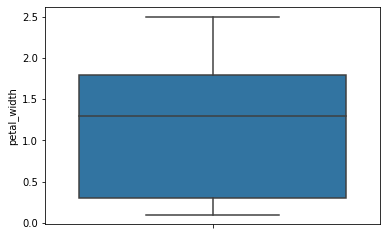

In [15]:
sns.boxplot(data=data, y="petal_width")
# sns.boxplot(data = data, x = "petal_width")

Pero aporta mucha más información si separamos por especie.

<AxesSubplot:xlabel='species', ylabel='petal_width'>

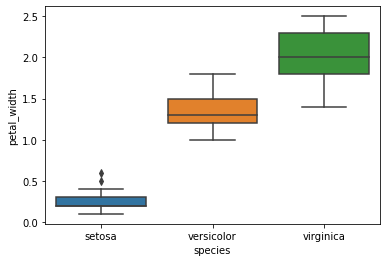

In [16]:
sns.boxplot(data = data, x = 'species', y = "petal_width")

## 4. Heatmaps y correlación

Correr la siguiente celda y googlear: ¿Qué es un heatmap?¿Cómo se hacen en Seaborn?¿Qué hacía la función `corr()` de Pandas?¿Cuáles son sus parámetros?¿Qué hace el parámetro `method`? Interpretar el gráfico obtenido.

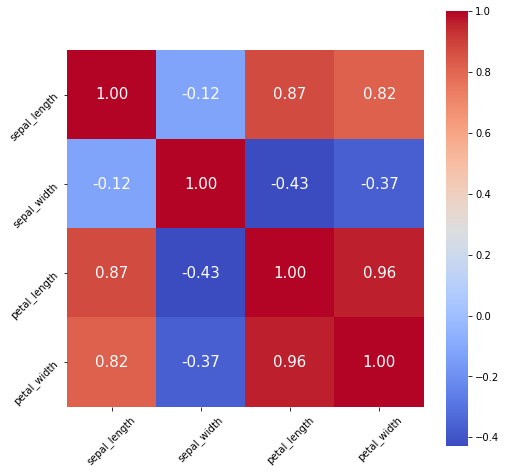

In [51]:
corr = data.drop(columns = 'species').corr()


plt.figure(figsize=(8,8))

sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.drop(columns = 'species').columns, 
           yticklabels= data.drop(columns = 'species').columns,
           cmap= 'coolwarm')

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

## 5. Combinando con Matplotlib

Como Seaborn corre sobre Matplotlib, se pueden combinar instrucciones de ambas librerías sin problemas. Veamos un ejemplo:

Text(0, 0.5, 'Ancho del pétalo (cm)')

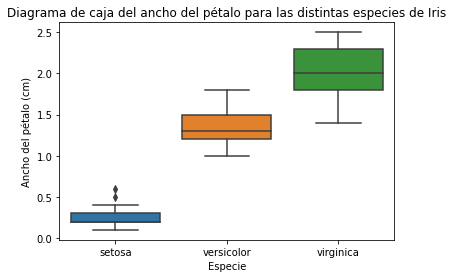

In [18]:
sns.boxplot(data = data, x = 'species', y = "petal_width")
plt.title('Diagrama de caja del ancho del pétalo para las distintas especies de Iris')

# Con estas instrucciones reemplazamos las etiquetas en los ejes que pone Seaborn
plt.xlabel('Especie')
plt.ylabel('Ancho del pétalo (cm)')

## Ejercitación

Elige uno de los datasets disponibles en Seaborn o el dataset de críticas de vinos del encuentro anterior. Aplica las herramientas vistas de Pandas y de Seaborn para obtener una primera aproximación a las características del conjunto de datos elegido.

In [52]:
titanic = sns.load_dataset('titanic')

In [53]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [54]:
car_crashes = sns.load_dataset('car_crashes')

In [55]:
car_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


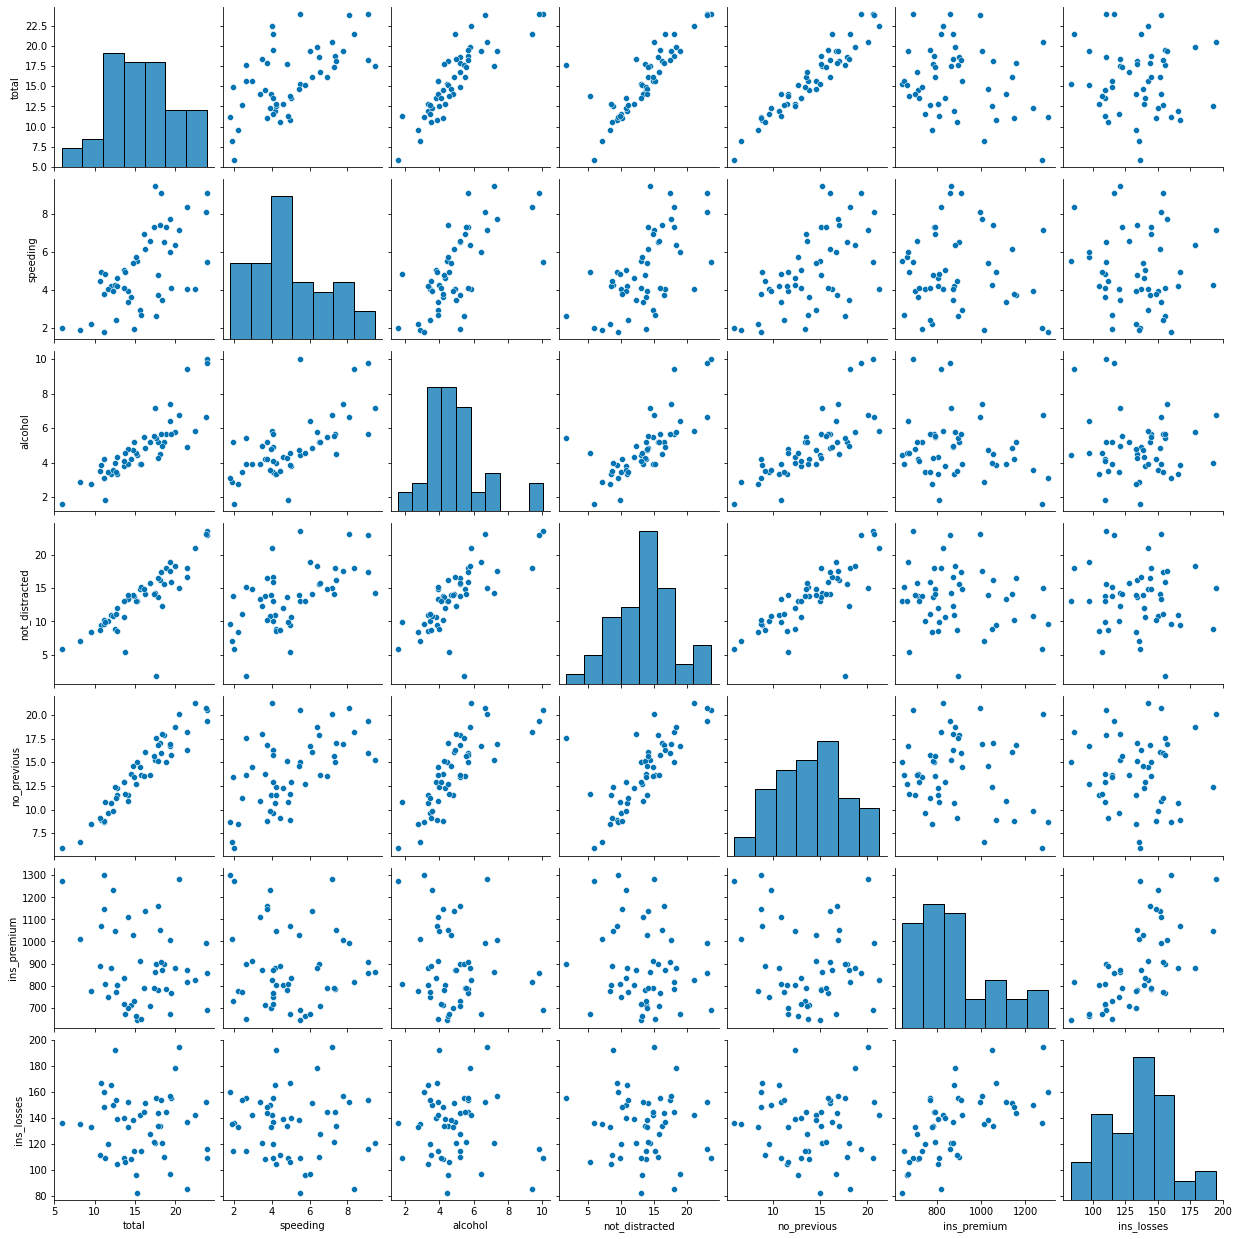

In [56]:
sns.pairplot(car_crashes)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


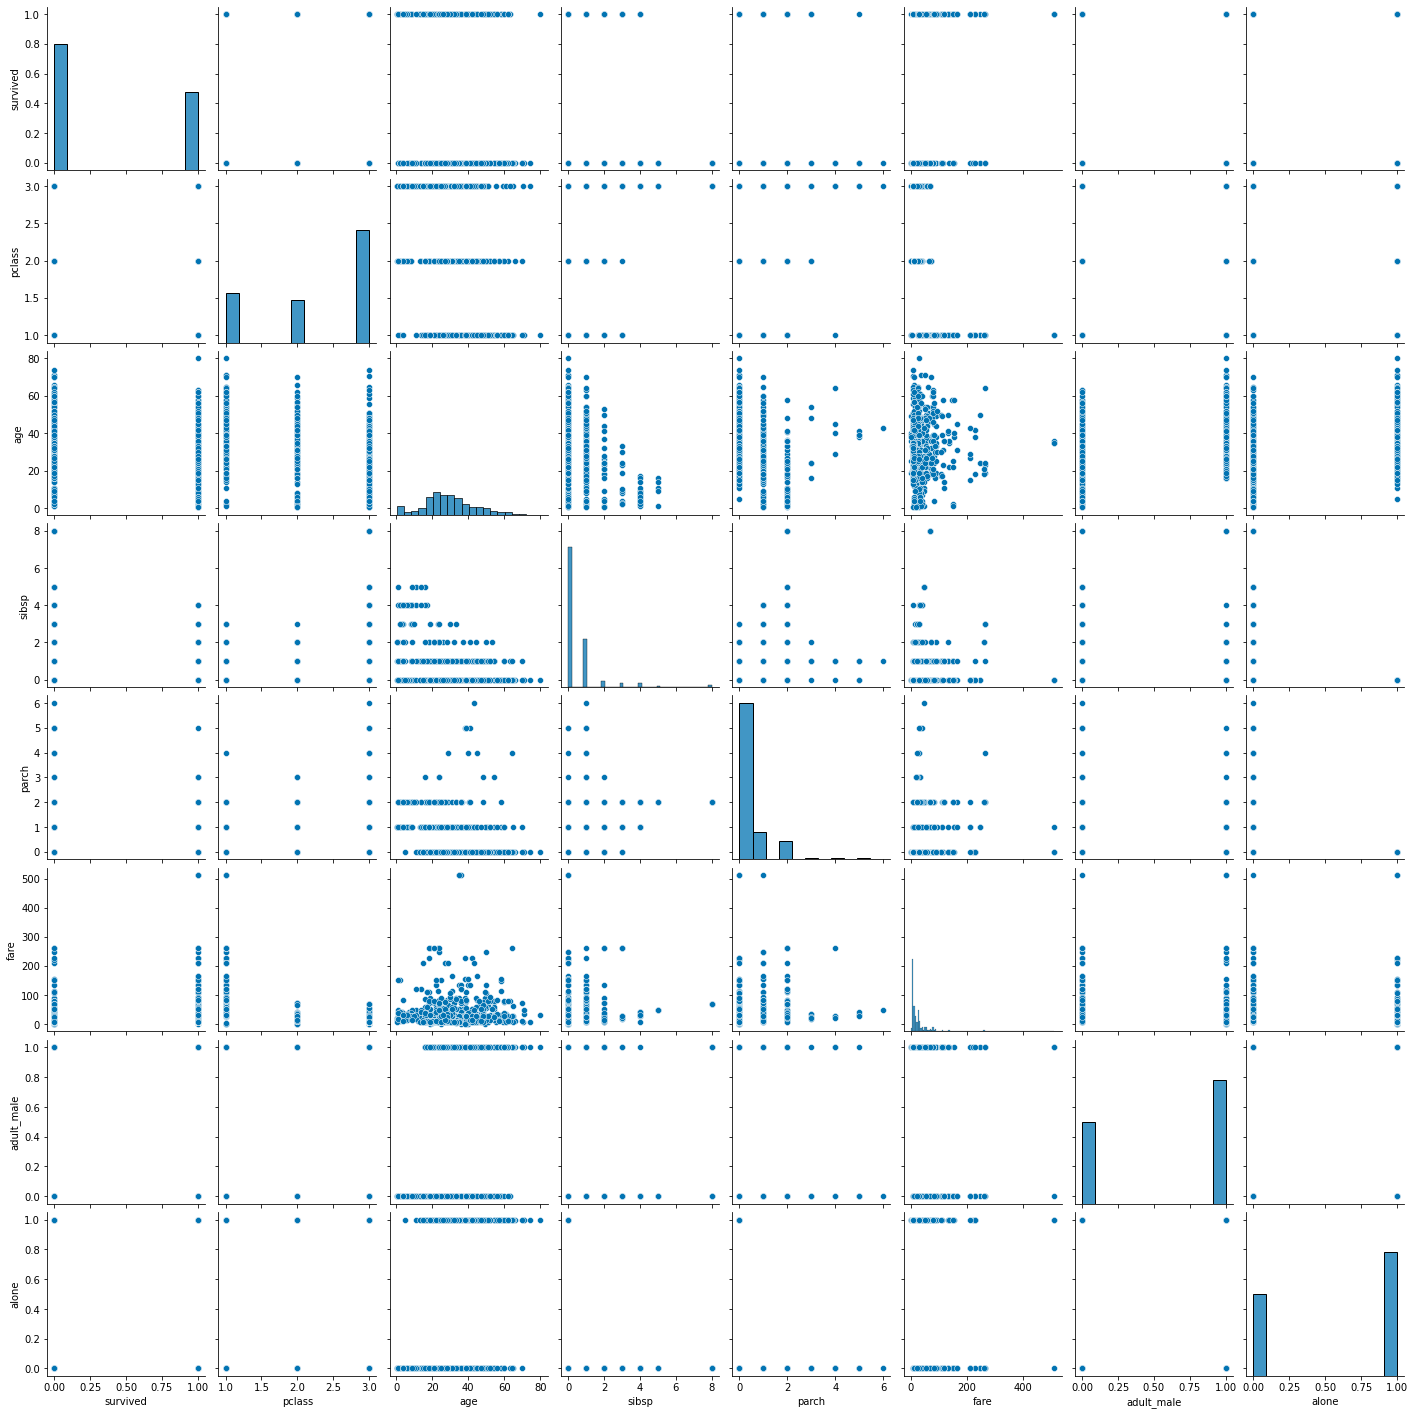

In [57]:
sns.pairplot(titanic)